# Data lending club

En este notebook se desea predecir, antes de conceder un préstamo a una persona, la probabilidad de que no se devuelva completamente. 

### Para cada cliente se tiene la siguiente información: 

| LoanStatNew | Description |	
| :- |:- |
|*addr_state*|	The state provided by the borrower in the loan application									
|*all_util*|	Balance to credit limit on all trades									
|*annual_inc*|	The self-reported annual income provided by the borrower during registration.								
|*annual_inc_joint*|	The combined self-reported annual income provided by the co-borrowers during registration		
|*application_type*|	Indicates whether the loan is an individual application or a joint application with two co-borrower	|*desc*|	Loan description provided by the borrower									
|*dti*|	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.									
|*dti_joint*|	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income									
|*earliest_cr_line*|	The month the borrower's earliest reported credit line was opened									
|*emp_length*|	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 									
|*emp_title*|	The job title supplied by the Borrower when applying for the loan.								
|*fico_range_high*|	The upper boundary range the borrower’s FICO at loan origination belongs to.									
|*fico_range_low*|	The lower boundary range the borrower’s FICO at loan origination belongs to.									
|*grade*|	LC assigned loan grade									
|*home_ownership*|	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.									
|*id*|	A unique LC assigned ID for the loan listing.									
|*il_util*|	Ratio of total current balance to high credit/credit limit on all install acct									
|*initial_list_status*|	The initial listing status of the loan. Possible values are – W, F									
|*inq_fi*|	Number of personal finance inquiries									
|*inq_last_12m*|	Number of credit inquiries in past 12 months									
|*installment*|	The monthly payment owed by the borrower if the loan originates.									
|*int_rate*|	Interest Rate on the loan									
|*loan_amnt*|	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.									
|*loan_status*|	Current status of the loan									
|*max_bal_bc*|	Maximum current balance owed on all revolving accounts									
|*member_id*|	A unique LC assigned Id for the borrower member.									
|*mo_sin_old_il_acct*|	Months since oldest bank installment account opened									
|*mo_sin_old_rev_tl_op*|	Months since oldest revolving account opened									
|*mort_acc*|	Number of mortgage accounts.									
|*mths_since_last_delinq*|	The number of months since the borrower's last delinquency.									
|*mths_since_last_major_derog*|	Months since most recent 90-day or worse rating									
|*mths_since_last_record*|	The number of months since the last public record.									
|*mths_since_rcnt_il*|	Months since most recent installment accounts opened									
|*mths_since_recent_bc_dlq*|	Months since most recent bankcard delinquency									
|*mths_since_recent_revol_delinq*|	Months since most recent revolving delinquency.									
|*open_acc*|	The number of open credit lines in the borrower's credit file.									
|*open_acc_6m*|	Number of open trades in last 6 months									
|*open_il_12m*|	Number of installment accounts opened in past 12 months									
|*open_il_24m*|	Number of installment accounts opened in past 24 months									
|*open_il_6m*|	Number of currently active installment trades									
|*open_rv_12m*|	Number of revolving trades opened in past 12 months									
|*open_rv_24m*|	Number of revolving trades opened in past 24 months									
|*pub_rec*|	Number of derogatory public records									
|*pub_rec_bankruptcies*|	Number of public record bankruptcies									
|*purpose*|	A category provided by the borrower for the loan request. 									
|*revol_util*|	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.									
|*sub_grade*|	LC assigned loan subgrade									
|*term*|	The number of payments on the loan. Values are in months and can be either 36 or 60.									
|*title*|	The loan title provided by the borrower									
|*total_acc*|	The total number of credit lines currently in the borrower's credit file									
|*total_bal_il*|	Total current balance of all installment accounts									
|*total_cu_tl*|	Number of finance trades									
|*url*|	URL for the LC page with listing data.									
|*verification_status*|	Indicates if income was verified by LC, not verified, or if the income source was verified									
|*verified_status_joint*|	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified									
|*zip_code*|	The first 3 numbers of the zip code provided by the borrower in the loan application.						

### 1. Preprocessing básico


En primer lugar, importamos las librerías que vamos a usar durante todo el proyecto

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#import plotly.express as px
import plotly.express as px
from sklearn.impute import KNNImputer
import scipy.stats as ss
import warnings

Es importante visualizar cómo es nuestra base de datos

In [3]:
data = pd.read_csv('pd_data_initial_preprocessing.csv')

/Users/anasanuy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.head()

id                                                url zip_code  \
0  112435993  https://lendingclub.com/browse/loanDetail.acti...    148xx   
1  112290210  https://lendingclub.com/browse/loanDetail.acti...    021xx   
2  112436985  https://lendingclub.com/browse/loanDetail.acti...    018xx   
3  112439006  https://lendingclub.com/browse/loanDetail.acti...    913xx   
4  112438929  https://lendingclub.com/browse/loanDetail.acti...    560xx   

   mths_since_last_record  il_util  mths_since_recent_bc_dlq  \
0                     NaN      NaN                       NaN   
1                     NaN     69.0                       NaN   
2                     NaN      NaN                       NaN   
3                     NaN     95.0                       NaN   
4                     NaN     72.0                      26.0   

   mths_since_rcnt_il  all_util  inq_fi  max_bal_bc  ...  initial_list_status  \
0                 NaN      55.0     1.0      2315.0  ...                    w   
1                26.0      94.0     0.0      1962.0  ...                    w   
2                10.0      45.0     1.0      1950.0  ...                    w   
3                 6.0      60.0     1.0      4240.0  ...                    w   
4               127.0      78.0     0.0      2996.0  ...                    w   

   application_type  pub_rec  pub_rec_bankruptcies  loan_amnt  mort_acc  \
0        Individual      0.0                   0.0     2300.0       0.0   
1        Individual      0.0                   0.0    16000.0       7.0   
2        Individual      0.0                   0.0     6025.0       2.0   
3        Individual      0.0                   0.0    20400.0       0.0   
4        Individual      0.0                   0.0    13000.0       1.0   

   mo_sin_old_rev_tl_op  open_acc  earliest_cr_line_month  \
0                 381.0       4.0                     9.0   
1                 300.0       9.0                     6.0   
2                 180.0      11.0                     6.0   
3                 125.0      15.0                     1.0   
4                 184.0       5.0                     2.0   

   earliest_cr_line_year  
0                 1985.0  
1                 1992.0  
2                 2002.0  
3                 2007.0  
4                 2002.0  

[5 rows x 51 columns]

In [5]:
data.columns

Index(['id', 'url', 'zip_code', 'mths_since_last_record', 'il_util',
       'mths_since_recent_bc_dlq', 'mths_since_rcnt_il', 'all_util', 'inq_fi',
       'max_bal_bc', 'total_cu_tl', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'total_bal_il', 'open_rv_12m', 'open_rv_24m',
       'open_il_24m', 'inq_last_12m', 'mths_since_last_major_derog',
       'mths_since_recent_revol_delinq', 'mths_since_last_delinq', 'emp_title',
       'emp_length', 'mo_sin_old_il_acct', 'revol_util', 'dti',
       'verification_status', 'annual_inc', 'home_ownership', 'sub_grade',
       'grade', 'term', 'int_rate', 'installment', 'loan_status', 'total_acc',
       'purpose', 'addr_state', 'fico_range_low', 'fico_range_high',
       'initial_list_status', 'application_type', 'pub_rec',
       'pub_rec_bankruptcies', 'loan_amnt', 'mort_acc', 'mo_sin_old_rev_tl_op',
       'open_acc', 'earliest_cr_line_month', 'earliest_cr_line_year'],
      dtype='object')

Antes de hacer nada, vamos a obtener la información de un cliente aleatorio para ver cómo es:

In [6]:
data.iloc[45]

id                                                                        110411462
url                               https://lendingclub.com/browse/loanDetail.acti...
zip_code                                                                      075xx
mths_since_last_record                                                          NaN
il_util                                                                         NaN
mths_since_recent_bc_dlq                                                        NaN
mths_since_rcnt_il                                                             47.0
all_util                                                                       53.0
inq_fi                                                                          1.0
max_bal_bc                                                                   6121.0
total_cu_tl                                                                     0.0
open_acc_6m                                                                 

Hay 51 variables (columns) en total: ya hemos aclarado qué significan cada una de ellas. Después haremos un análisis de ellas en mayor profundidad

Veamos el tipo de variables que tenemos

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884884 entries, 0 to 884883
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              884884 non-null  object 
 1   url                             884876 non-null  object 
 2   zip_code                        884876 non-null  object 
 3   mths_since_last_record          155100 non-null  float64
 4   il_util                         216581 non-null  float64
 5   mths_since_recent_bc_dlq        225434 non-null  float64
 6   mths_since_rcnt_il              242773 non-null  float64
 7   all_util                        249497 non-null  float64
 8   inq_fi                          249524 non-null  float64
 9   max_bal_bc                      249524 non-null  float64
 10  total_cu_tl                     249524 non-null  float64
 11  open_acc_6m                     249524 non-null  float64
 12  open_act_il     

Son 51 variables y 884884 observaciones. 
No todas las variables son numéricas, así que habrá que ver cómo trabajar con ellas (39 numéricas, 12 no).

Eliminamos las variables id, url, zip_code y emp_title del dataset, ya que no nos aportan información.

In [8]:
data=data.drop(['id','url','zip_code'],axis=1)

También eliminamos las observaciones con todo valores nulos

In [9]:
data = data.dropna(axis=0,how='all')

In [10]:
data.head()

mths_since_last_record  il_util  mths_since_recent_bc_dlq  \
0                     NaN      NaN                       NaN   
1                     NaN     69.0                       NaN   
2                     NaN      NaN                       NaN   
3                     NaN     95.0                       NaN   
4                     NaN     72.0                      26.0   

   mths_since_rcnt_il  all_util  inq_fi  max_bal_bc  total_cu_tl  open_acc_6m  \
0                 NaN      55.0     1.0      2315.0          0.0          0.0   
1                26.0      94.0     0.0      1962.0          6.0          2.0   
2                10.0      45.0     1.0      1950.0          5.0          1.0   
3                 6.0      60.0     1.0      4240.0          1.0          1.0   
4               127.0      78.0     0.0      2996.0          0.0          0.0   

   open_act_il  ...  initial_list_status  application_type  pub_rec  \
0          0.0  ...                    w        Individual      0.0   
1          1.0  ...                    w        Individual      0.0   
2          0.0  ...                    w        Individual      0.0   
3         10.0  ...                    w        Individual      0.0   
4          1.0  ...                    w        Individual      0.0   

   pub_rec_bankruptcies  loan_amnt  mort_acc  mo_sin_old_rev_tl_op  open_acc  \
0                   0.0     2300.0       0.0                 381.0       4.0   
1                   0.0    16000.0       7.0                 300.0       9.0   
2                   0.0     6025.0       2.0                 180.0      11.0   
3                   0.0    20400.0       0.0                 125.0      15.0   
4                   0.0    13000.0       1.0                 184.0       5.0   

   earliest_cr_line_month earliest_cr_line_year  
0                     9.0                1985.0  
1                     6.0                1992.0  
2                     6.0                2002.0  
3                     1.0                2007.0  
4                     2.0                2002.0  

[5 rows x 48 columns]

Ahora tenemos 48 variables.

In [11]:
data.describe().T

count          mean            std  \
mths_since_last_record          155100.0     69.193056      26.469788   
il_util                         216581.0     68.935964      24.314068   
mths_since_recent_bc_dlq        225434.0     39.128632      22.793899   
mths_since_rcnt_il              242773.0     21.217005      25.439242   
all_util                        249497.0     58.072927      20.934080   
inq_fi                          249524.0      0.985092       1.470832   
max_bal_bc                      249524.0   5746.256717    5503.678029   
total_cu_tl                     249524.0      1.448702       2.616477   
open_acc_6m                     249524.0      0.897461       1.106632   
open_act_il                     249524.0      2.880861       3.088793   
open_il_12m                     249524.0      0.635133       0.862520   
total_bal_il                    249524.0  36064.207283   44125.271780   
open_rv_12m                     249524.0      1.300973       1.500241   
open_rv_24m                     249524.0      2.801438       2.618932   
open_il_24m                     249524.0      1.546993       1.532556   
inq_last_12m                    249524.0      2.056379       2.344495   
mths_since_last_major_derog     251613.0     44.428925      22.381966   
mths_since_recent_revol_delinq  315834.0     35.274040      22.443438   
mths_since_last_delinq          453449.0     33.659163      21.904699   
emp_length                      833683.0      6.071254       3.584866   
mo_sin_old_il_acct              859262.0    127.252767      52.470847   
revol_util                      884387.0     52.960216      24.014491   
dti                             884615.0     18.903262      11.722350   
annual_inc                      884876.0  77102.415266  135491.609288   
sub_grade                       884876.0      2.982807       1.429335   
term                            884876.0     43.426152      11.094145   
int_rate                        884876.0     13.113816       4.611939   
installment                     884876.0    440.549628     254.920865   
total_acc                       884876.0     25.111583      12.022320   
fico_range_low                  884876.0    694.698726      30.936483   
fico_range_high                 884876.0    698.698854      30.937106   
pub_rec                         884876.0      0.226261       0.622785   
pub_rec_bankruptcies            884876.0      0.134489       0.380002   
loan_amnt                       884876.0  14975.072016    8804.519267   
mort_acc                        884876.0      1.653662       1.983354   
mo_sin_old_rev_tl_op            884876.0    184.482419      95.630040   
open_acc                        884876.0     11.817683       5.584597   
earliest_cr_line_month          884876.0      6.751170       3.366211   
earliest_cr_line_year           884876.0   1998.594400       7.703791   

                                    min       25%       50%       75%  \
mths_since_last_record             0.00     51.00     69.00     88.00   
il_util                            0.00     54.00     71.00     86.00   
mths_since_recent_bc_dlq           0.00     20.00     37.00     58.00   
mths_since_rcnt_il                 0.00      7.00     14.00     24.00   
all_util                           0.00     44.00     59.00     73.00   
inq_fi                             0.00      0.00      0.00      1.00   
max_bal_bc                         0.00   2300.00   4397.00   7504.00   
total_cu_tl                        0.00      0.00      0.00      2.00   
open_acc_6m                        0.00      0.00      1.00      1.00   
open_act_il                        0.00      1.00      2.00      3.00   
open_il_12m                        0.00      0.00      0.00      1.00   
total_bal_il                       0.00   9233.00  23604.00  46690.00   
open_rv_12m                        0.00      0.00      1.00      2.00   
open_rv_24m                        0.00      1.00      2.00      4.00   
open_il_24m        

Vemos que medias y varianzas difieren bastante entre algunas variables, por lo que seguramente vayamos a tener que estandarizar en alguno de los métodos que se utilicen.

Vamos a ver cuántos valores nulos hay por variable

In [12]:
data.isna().sum()

mths_since_last_record            729776
il_util                           668295
mths_since_recent_bc_dlq          659442
mths_since_rcnt_il                642103
all_util                          635379
inq_fi                            635352
max_bal_bc                        635352
total_cu_tl                       635352
open_acc_6m                       635352
open_act_il                       635352
open_il_12m                       635352
total_bal_il                      635352
open_rv_12m                       635352
open_rv_24m                       635352
open_il_24m                       635352
inq_last_12m                      635352
mths_since_last_major_derog       633263
mths_since_recent_revol_delinq    569042
mths_since_last_delinq            431427
emp_title                          52693
emp_length                         51193
mo_sin_old_il_acct                 25614
revol_util                           489
dti                                  261
verification_sta

Habrá que tener cuidado, ya que muchas variables del dataset tienen nulos. En especial habrá que estudiar cómo imputar los valores y si merece la pena hacerlo con las variables con porcentajes tan altos de nulos. Por ejemplo,en la variable mths_since_last_record hay un 82% de valores nulos, lo que puede hacer inviable su imputación.


Vamos a ver también la cantidad de valores únicos que hay en cada variable

In [13]:
data.nunique()

mths_since_last_record               122
il_util                              221
mths_since_recent_bc_dlq             162
mths_since_rcnt_il                   307
all_util                             165
inq_fi                                25
max_bal_bc                         23621
total_cu_tl                           46
open_acc_6m                           15
open_act_il                           45
open_il_12m                           12
total_bal_il                       88946
open_rv_12m                           25
open_rv_24m                           43
open_il_24m                           19
inq_last_12m                          37
mths_since_last_major_derog          171
mths_since_recent_revol_delinq       163
mths_since_last_delinq               157
emp_title                         214509
emp_length                            10
mo_sin_old_il_acct                   520
revol_util                          1271
dti                                 6756
verification_sta

Para terminar el análisis descriptivo de las variables, representaremos las continuas en forma de histograma y boxplot y las categóricas en gráficos de barras.

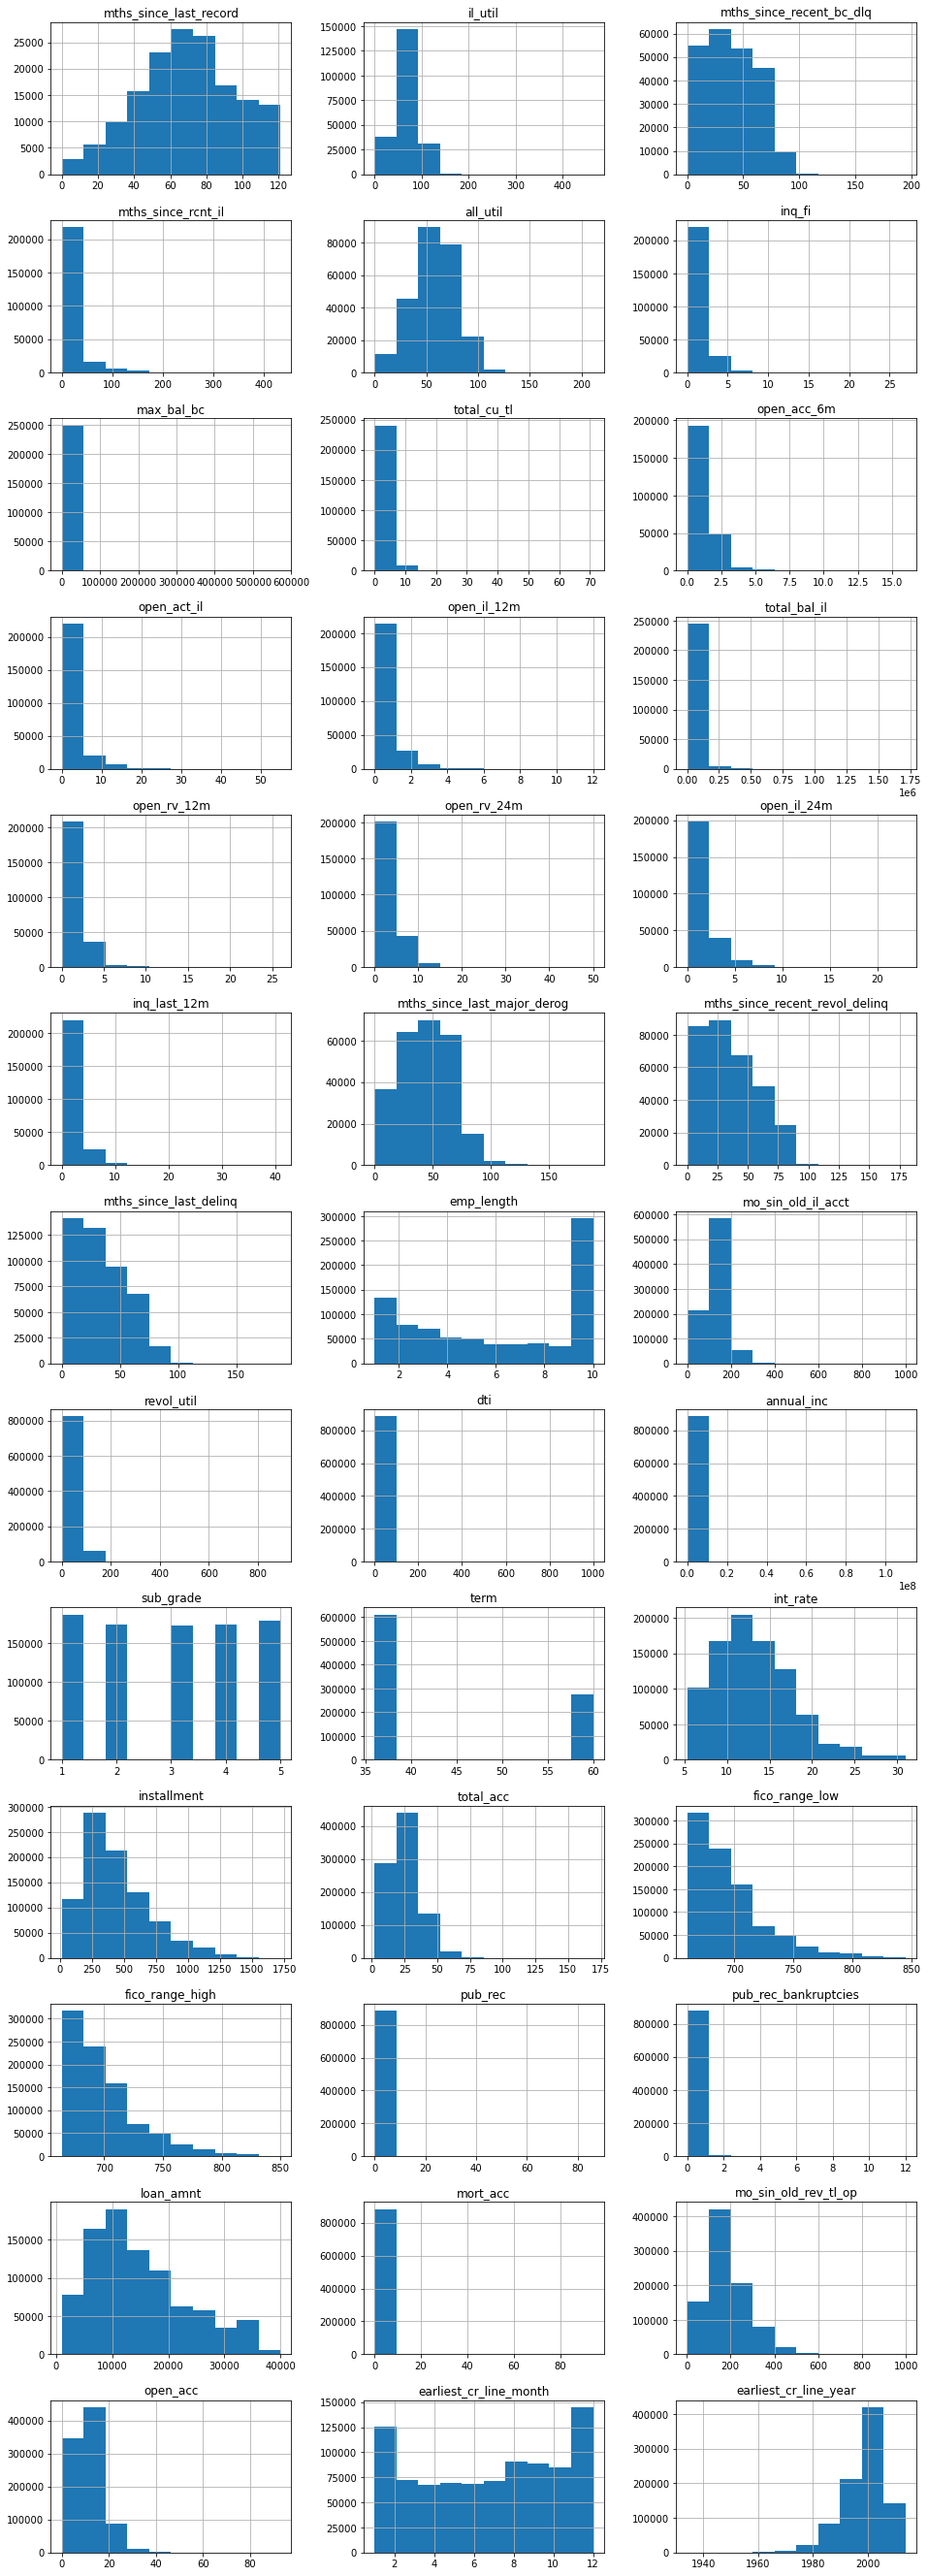

In [14]:
data.hist(figsize=(16,48),layout=(13,3)) #bins son la cantidad de barras
plt.show()

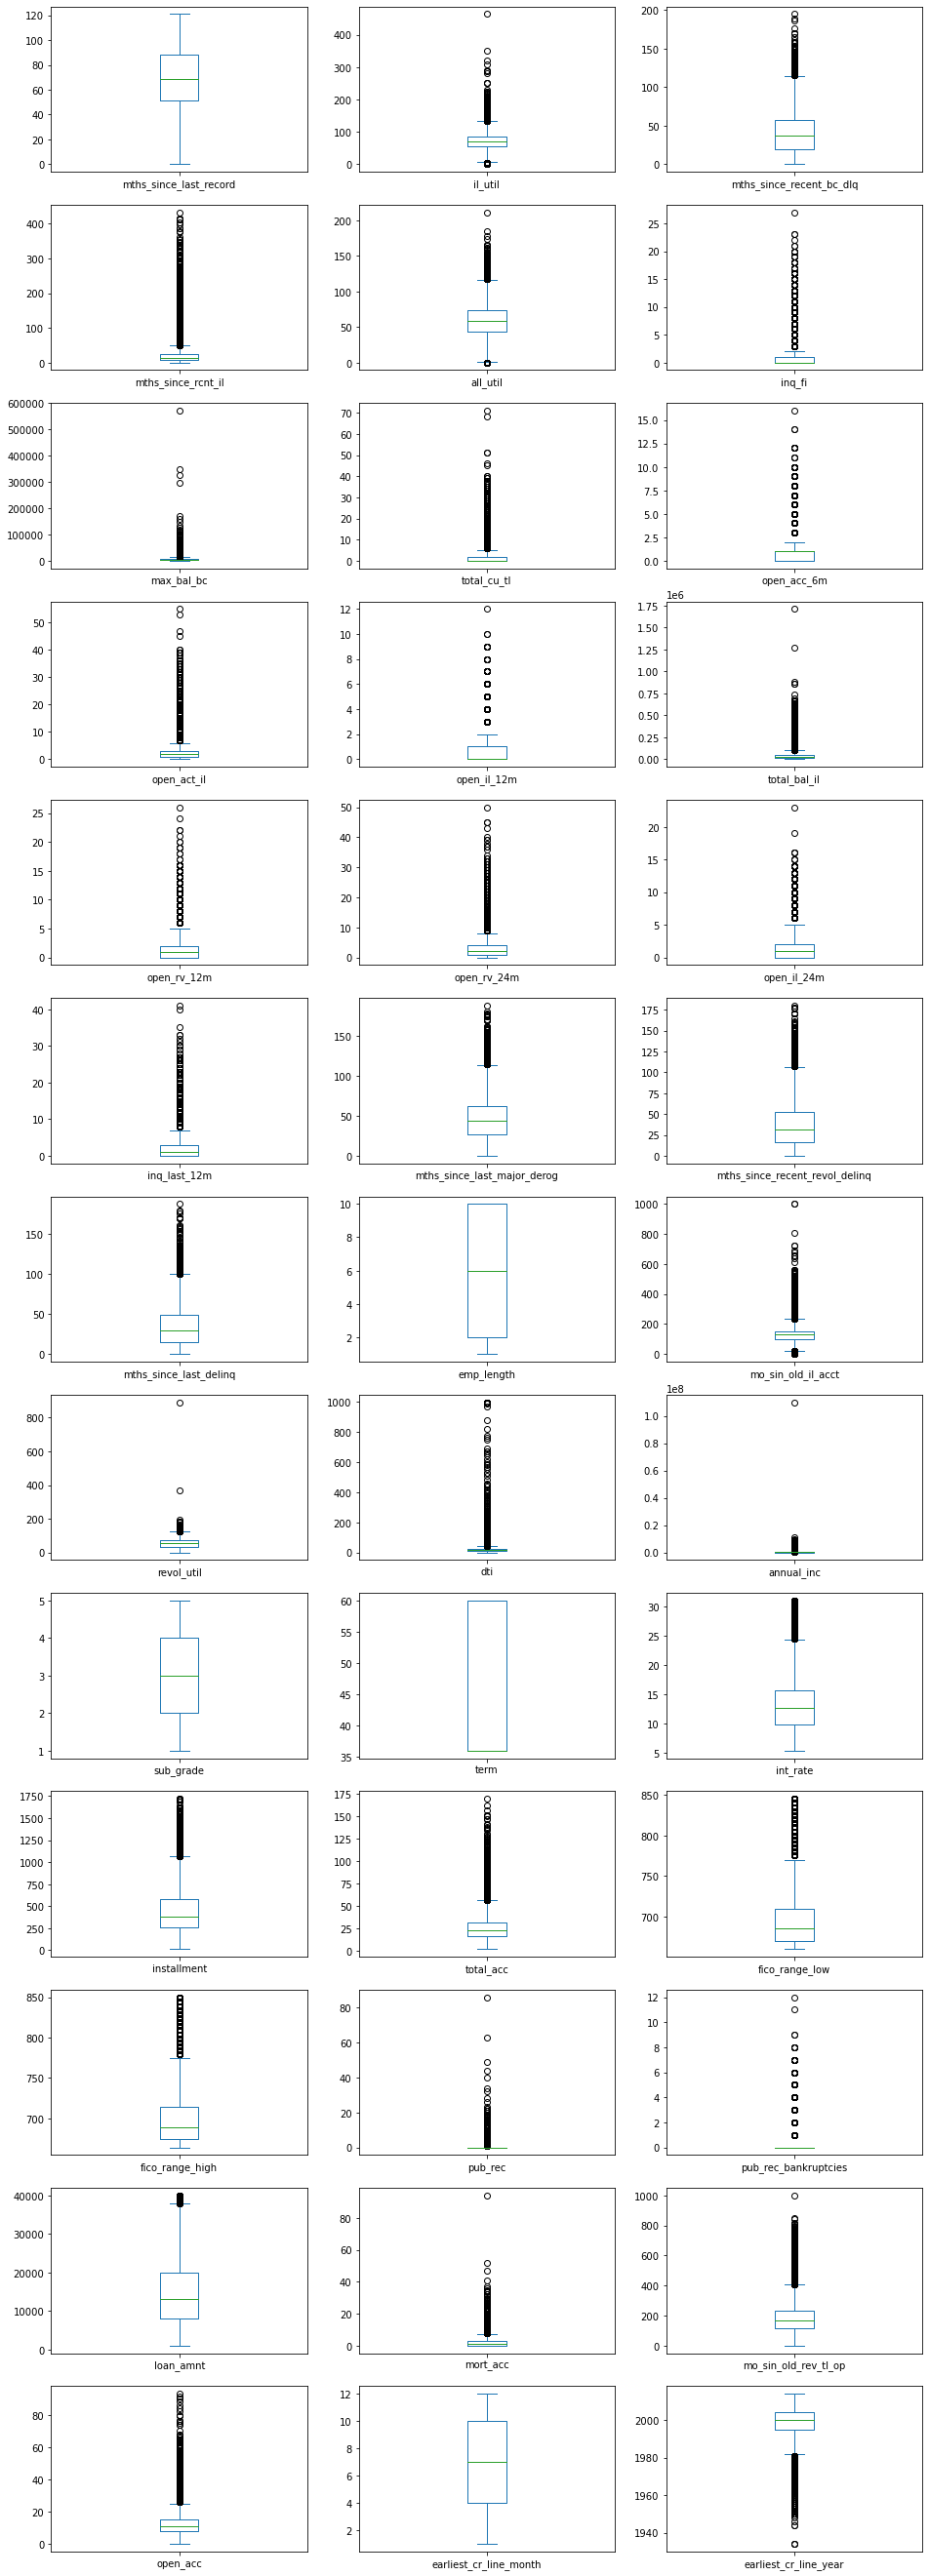

In [15]:
data.plot(figsize=(16,48),kind='box', subplots=True,layout=(13,3),sharex=False, sharey=False)
plt.show()

Hay un outlier muy claro que puede estar afectando a la variable anual_inc,variable que indica los ingresos anuales autodeclarados proporcionados por el prestatario durante el registro.
Veamos mejor el outlier:

<AxesSubplot:xlabel='annual_inc'>

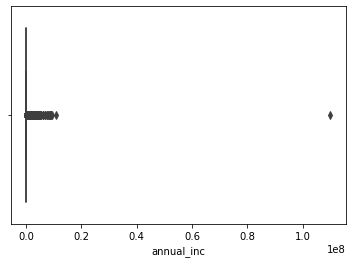

In [16]:
sns.boxplot(x=data['annual_inc'])

In [17]:
data['annual_inc'].max()

110000000.0

Otro outlier claro que se observa es en la variable revol_util, la que nos dice la cantidad de crédito que el prestatario está utilizando en relación con todo el crédito renovable disponible.
Veamos mejor ese outlier:

<AxesSubplot:xlabel='revol_util'>

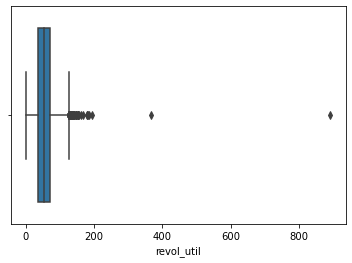

In [18]:
sns.boxplot(x=data['revol_util'])

In [19]:
data['revol_util'].max()

892.3

Los valores outlier se pueden sustituir por la media, mediana, valores extremos (media+3std o media-3std). Tras el anterior análisis, hemos decidido como primera iteración dejarlos sin sustituir. Una vez llegue al modelo se pueden realizar iteraciones utilizando diferentes métodos para comprobar si mejora el modelo.

Otro outlier destacable que se observa es en la variable 'mort_acc', que nos dice el número de cuentas hipotecarias. Veamos mejor ese outlier:

<AxesSubplot:xlabel='mort_acc'>

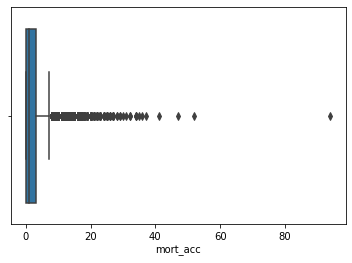

In [20]:
sns.boxplot(x=data['mort_acc'])

In [21]:
data['mort_acc'].max()

94.0

Se trata de un outlier en la variable mort_acc que puede influenciar a los cálculos. Ya que no es nada común en los datos que tenemos tener 94 hipotecas, consideramos que en este caso es mejor eliminarlo. 

In [22]:
data = data[(data['mort_acc']<60)]

Finalmente, representamos las variables categóricas en gráficos de barras y vemos cómo se distribuyen los datos en sus distintas categorías

<AxesSubplot:title={'center':'purpose'}>

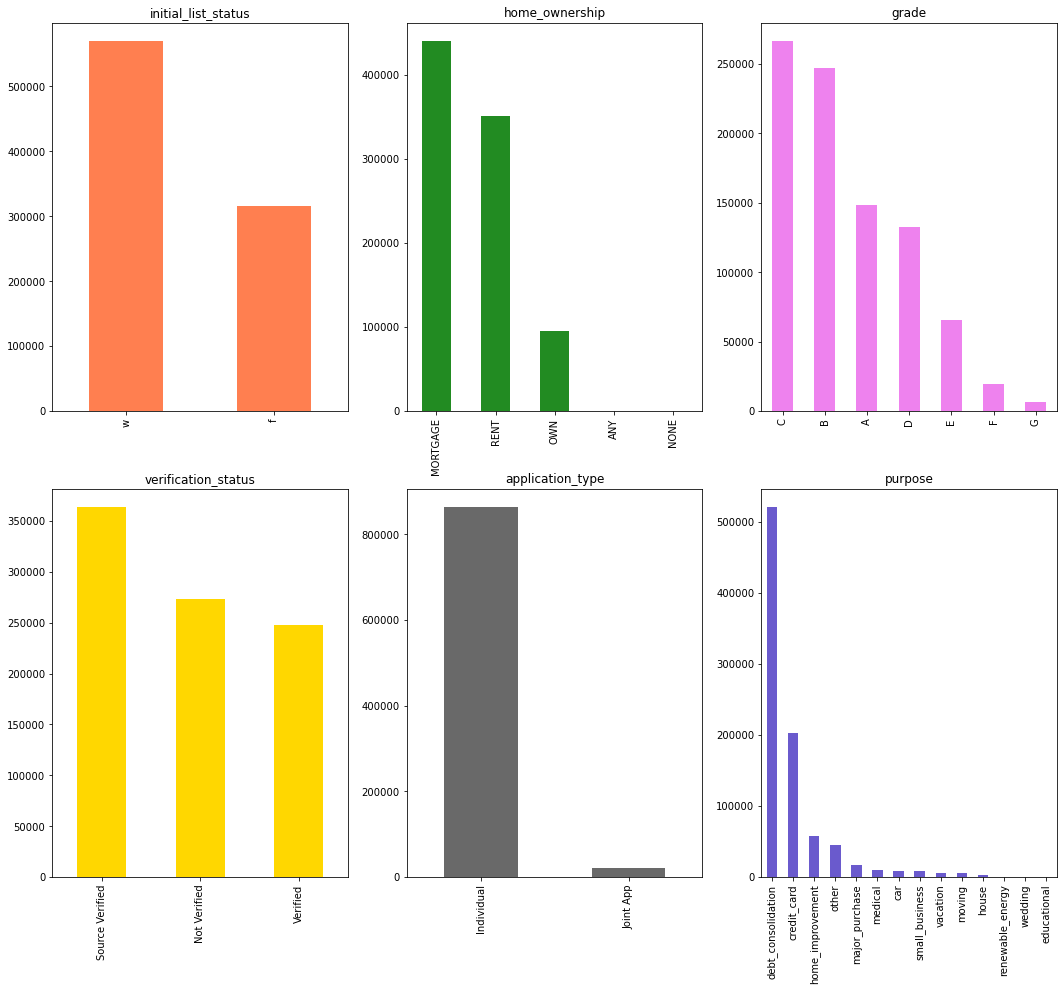

In [23]:
plt.figure(figsize=(18, 50))

plt.subplot(6, 3, 1)
data['initial_list_status'].value_counts().plot(kind='bar',color = 'coral',linewidth = 3,title='initial_list_status')

plt.subplot(6, 3, 2)
data['home_ownership'].value_counts().plot(kind='bar',color = 'forestgreen',linewidth = 3,title='home_ownership')

plt.subplot(6, 3, 3)
data['grade'].value_counts().plot(kind='bar',color = 'violet',linewidth = 3,title='grade')

plt.subplot(6, 3, 4)
data['verification_status'].value_counts().plot(kind='bar',color = 'gold',linewidth = 3,title='verification_status')

plt.subplot(6, 3, 5)
data['application_type'].value_counts().plot(kind='bar',color = 'dimgray',linewidth = 3,title='application_type')

plt.subplot(6, 3, 6)
data['purpose'].value_counts().plot(kind='bar',color = 'slateblue',linewidth = 3,title='purpose')

Estudiamos la variable emp_title aparte, ya que,como hemos visto antes, tiene demasiados valores unicos distintos:

In [24]:
data['emp_title'].value_counts()[:20]

Teacher               17113
Manager               14553
Owner                  8089
Registered Nurse       6912
RN                     6618
Supervisor             6327
Sales                  5542
Driver                 5205
Project Manager        4913
Office Manager         4336
Director               4044
General Manager        3967
owner                  3756
manager                3587
teacher                3416
President              3318
Engineer               3303
Vice President         2839
driver                 2747
Operations Manager     2634
Name: emp_title, dtype: int64

<BarContainer object of 20 artists>

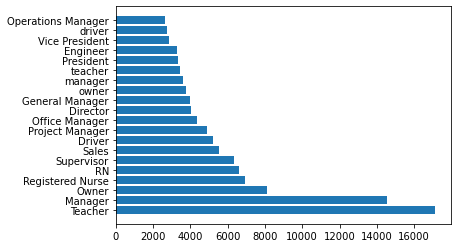

In [25]:
plt.barh(data.emp_title.value_counts()[:20].index, data.emp_title.value_counts()[:20])

Es inviable hacer un análisis utilizando esta variable por la cantidad de valores únicos que tiene, por lo que la eliminaremos también.

In [26]:
data=data.drop(['emp_title'],axis=1)

Vamos a estudiar la distribución de la variable objetivo loan_status, que indica el estado actual del préstamo y es una variable categórica.

In [27]:
data['loan_status'].value_counts()

Current               422684
Fully Paid            345520
Charged Off            97047
Late (31-120 days)     11168
In Grace Period         5507
Late (16-30 days)       2915
Default                   34
Name: loan_status, dtype: int64

<AxesSubplot:>

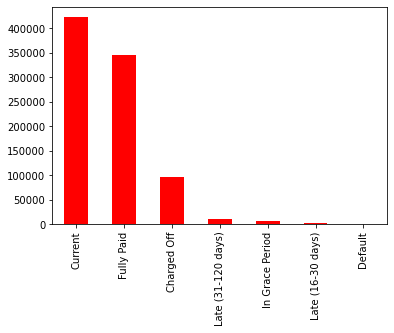

In [28]:
data['loan_status'].value_counts().plot(kind='bar',color = 'red',linewidth = 3)

Loan_status es una variable categórica con 7 niveles  y sin valores nulos. La mayoría de los valores son "current" (Actual) y "fully paid" (Totalmente pagado).


Por último, calcularemos la correlación entre variables.

In [29]:
data.corr()

mths_since_last_record   il_util  \
mths_since_last_record                        1.000000 -0.037540   
il_util                                      -0.037540  1.000000   
mths_since_recent_bc_dlq                     -0.057360  0.060892   
mths_since_rcnt_il                           -0.032272 -0.279929   
all_util                                     -0.014922  0.593590   
inq_fi                                       -0.042597  0.150360   
max_bal_bc                                    0.000346 -0.112540   
total_cu_tl                                   0.004893  0.028667   
open_acc_6m                                  -0.055815  0.165298   
open_act_il                                  -0.002077  0.328907   
open_il_12m                                  -0.001326  0.328236   
total_bal_il                                 -0.003023  0.334039   
open_rv_12m                                  -0.104838  0.068071   
open_rv_24m                                  -0.115880  0.076814   
open_il_24m                                   0.020599  0.300043   
inq_last_12m                                 -0.066671  0.167643   
mths_since_last_major_derog                   0.036692 -0.003623   
mths_since_recent_revol_delinq               -0.074116  0.059719   
mths_since_last_delinq                       -0.035102  0.044520   
emp_length                                    0.027933 -0.109813   
mo_sin_old_il_acct                           -0.063511  0.002828   
revol_util                                    0.046660 -0.053167   
dti                                           0.063109 -0.013754   
annual_inc                                   -0.079275 -0.051043   
sub_grade                                     0.008761  0.042975   
term                                          0.037984  0.016406   
int_rate                                     -0.001758  0.157807   
installment                                  -0.016476 -0.087767   
total_acc                                    -0.159056  0.118818   
fico_range_low                                0.210486 -0.131003   
fico_range_high                               0.210486 -0.131003   
pub_rec                                      -0.271428  0.014497   
pub_rec_bankruptcies                          0.237999  0.016969   
loan_amnt                                    -0.005499 -0.097055   
mort_acc                                     -0.126552 -0.047261   
mo_sin_old_rev_tl_op                         -0.130708 -0.110368   
open_acc                                      0.032690  0.135907   
earliest_cr_line_month                        0.003539  0.019291   
earliest_cr_line_year                         0.122281  0.084515   

                                mths_since_recent_bc_dlq  mths_since_rcnt_il  \
mths_since_last_record                         -0.057360           -0.032272   
il_util                                         0.060892           -0.279929   
mths_since_recent_bc_dlq                        1.000000           -0.032014   
mths_since_rcnt_il                             -0.032014            1.000000   
all_util                                        0.044854           -0.121856   
inq_fi                                          0.036746           -0.210672   
max_bal_bc                                     -0.017694            0.017884   
total_cu_tl                                     0.005230           -0.140435   
open_acc_6m                                     0.069366           -0.184575   
open_act_il                                    -0.017292           -0.212211   
open_il_12m                                     0.058737           -0.445130   
total_bal_il                                    0.005867           -0.238778   
open_rv_12m                                     0.092344           -0.029954   
open_rv_24m                                     0.131578           -0.044189   
open_il_24m                                     0.069346           -0.488459   
inq_last_12m                   

A priori, no hay correlaciones muy altas entre variables, exceptuando algún caso. Se pueden ver de manera mas visual así:

<AxesSubplot:>

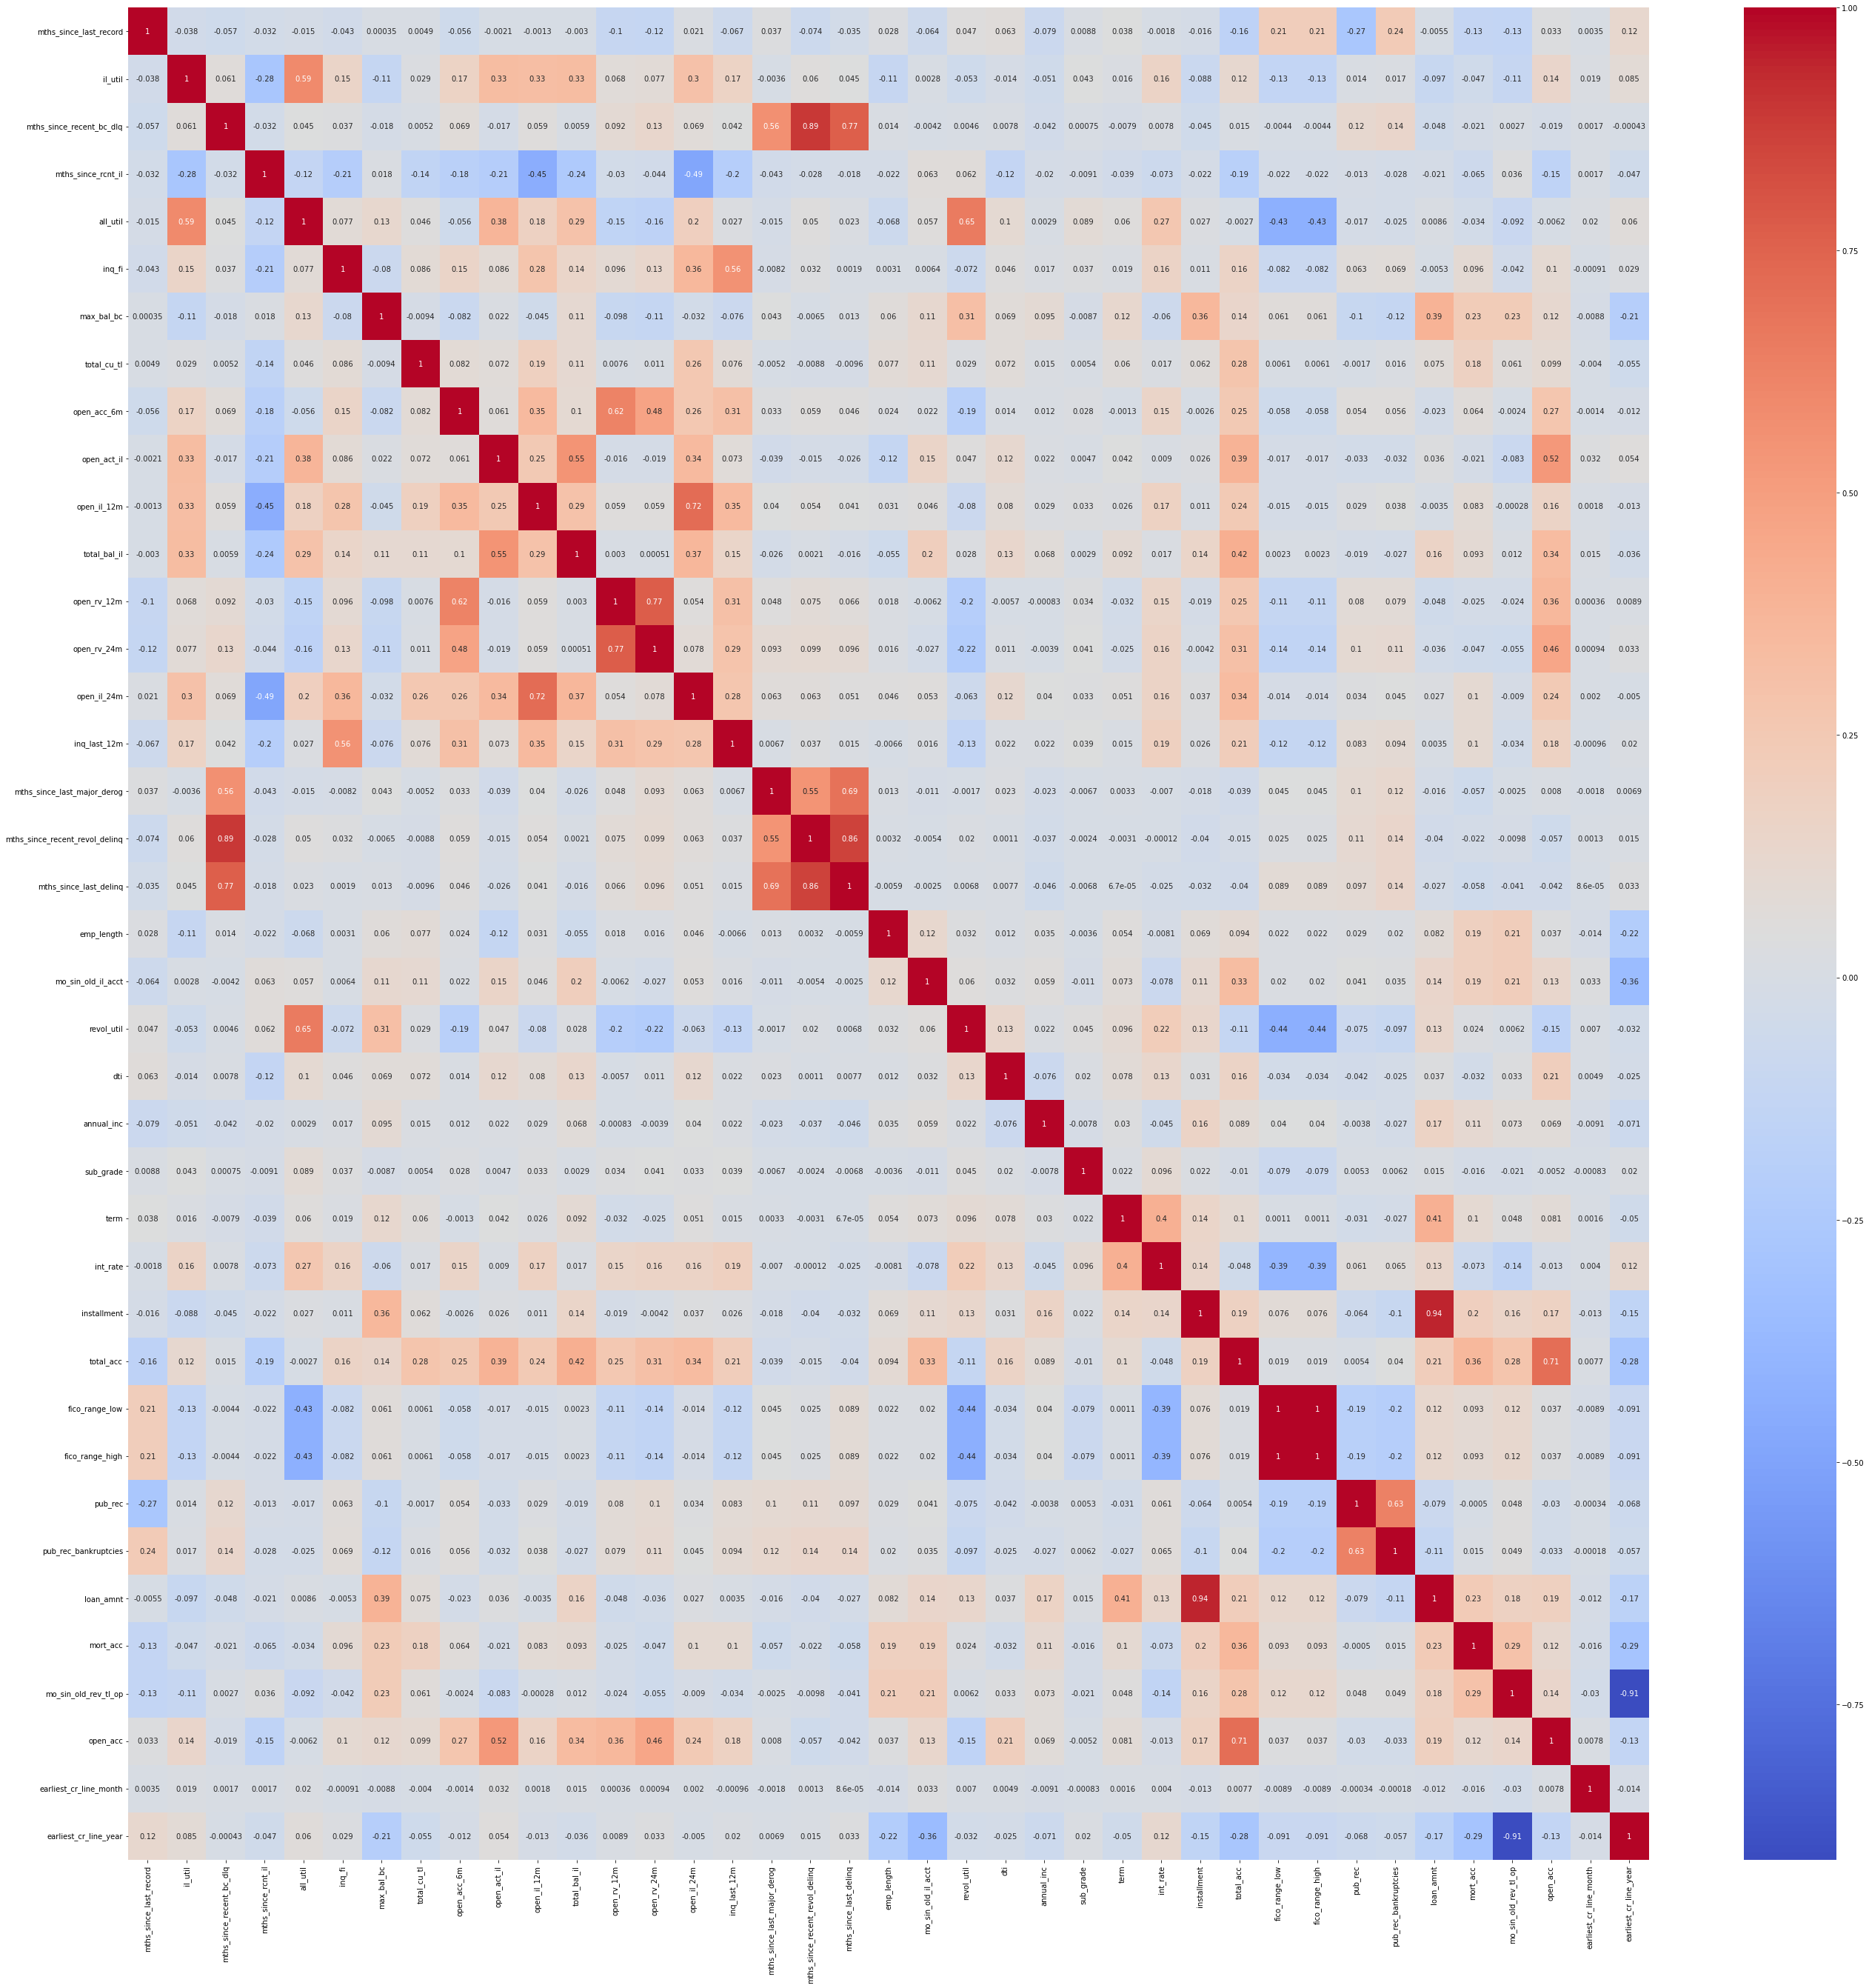

In [30]:
plt.figure(figsize=(46,46))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

### 2. Imputación de missings


Como se vio en el descriptivo, hay variables con valores nulos. En esta  parte analizaremos las variables una por una, decidiremos qué método de imputación de missings se adapta mejor a cada una de ellas y lo aplicaremos.

Para empezar, recordemos qué forma tienen los datos en nuestras variables y el número de valores nulos que había en cada una de ellas.

In [31]:
data.describe().T

count          mean            std  \
mths_since_last_record          155100.0     69.193056      26.469788   
il_util                         216581.0     68.935964      24.314068   
mths_since_recent_bc_dlq        225433.0     39.128601      22.793945   
mths_since_rcnt_il              242772.0     21.216767      25.439024   
all_util                        249496.0     58.072807      20.934036   
inq_fi                          249523.0      0.985088       1.470833   
max_bal_bc                      249523.0   5746.240519    5503.683110   
total_cu_tl                     249523.0      1.448700       2.616482   
open_acc_6m                     249523.0      0.897464       1.106633   
open_act_il                     249523.0      2.880873       3.088794   
open_il_12m                     249523.0      0.635136       0.862521   
total_bal_il                    249523.0  36064.351815   44125.301135   
open_rv_12m                     249523.0      1.300978       1.500241   
open_rv_24m                     249523.0      2.801441       2.618937   
open_il_24m                     249523.0      1.547000       1.532556   
inq_last_12m                    249523.0      2.056356       2.344470   
mths_since_last_major_derog     251613.0     44.428925      22.381966   
mths_since_recent_revol_delinq  315833.0     35.274006      22.443466   
mths_since_last_delinq          453448.0     33.659136      21.904715   
emp_length                      833682.0      6.071249       3.584865   
mo_sin_old_il_acct              859261.0    127.252658      52.470780   
revol_util                      884386.0     52.960178      24.014477   
dti                             884614.0     18.903257      11.722355   
annual_inc                      884875.0  77102.319323  135491.655789   
sub_grade                       884875.0      2.982809       1.429334   
term                            884875.0     43.426161      11.094149   
int_rate                        884875.0     13.113820       4.611940   
installment                     884875.0    440.548860     254.919986   
total_acc                       884875.0     25.111458      12.021749   
fico_range_low                  884875.0    694.698754      30.936490   
fico_range_high                 884875.0    698.698882      30.937112   
pub_rec                         884875.0      0.226261       0.622785   
pub_rec_bankruptcies            884875.0      0.134489       0.380002   
loan_amnt                       884875.0  14975.049386    8804.498507   
mort_acc                        884875.0      1.653558       1.980924   
mo_sin_old_rev_tl_op            884875.0    184.482044      95.629444   
open_acc                        884875.0     11.817677       5.584598   
earliest_cr_line_month          884875.0      6.751167       3.366212   
earliest_cr_line_year           884875.0   1998.594427       7.703751   

                                    min       25%       50%       75%  \
mths_since_last_record             0.00     51.00     69.00     88.00   
il_util                            0.00     54.00     71.00     86.00   
mths_since_recent_bc_dlq           0.00     20.00     37.00     58.00   
mths_since_rcnt_il                 0.00      7.00     14.00     24.00   
all_util                           0.00     44.00     59.00     73.00   
inq_fi                             0.00      0.00      0.00      1.00   
max_bal_bc                         0.00   2300.00   4397.00   7504.00   
total_cu_tl                        0.00      0.00      0.00      2.00   
open_acc_6m                        0.00      0.00      1.00      1.00   
open_act_il                        0.00      1.00      2.00      3.00   
open_il_12m                        0.00      0.00      0.00      1.00   
total_bal_il                       0.00   9233.00  23604.00  46690.00   
open_rv_12m                        0.00      0.00      1.00      2.00   
open_rv_24m                        0.00      1.00      2.00      4.00   
open_il_24m        

In [32]:
data.isna().sum()

mths_since_last_record            729775
il_util                           668294
mths_since_recent_bc_dlq          659442
mths_since_rcnt_il                642103
all_util                          635379
inq_fi                            635352
max_bal_bc                        635352
total_cu_tl                       635352
open_acc_6m                       635352
open_act_il                       635352
open_il_12m                       635352
total_bal_il                      635352
open_rv_12m                       635352
open_rv_24m                       635352
open_il_24m                       635352
inq_last_12m                      635352
mths_since_last_major_derog       633262
mths_since_recent_revol_delinq    569042
mths_since_last_delinq            431427
emp_length                         51193
mo_sin_old_il_acct                 25614
revol_util                           489
dti                                  261
verification_status                    0
annual_inc      

Observemos que tenemos muchísimos valores nulos, demasiado para poder eliminar todos los datos que con algún valor missing. Tendremos que imputarles un valor. Para comenzar hagamos unas observaciones:

1. La variable que más valores nulos tiene es mths_since_last_record. Observemos que al tener tal extrema cantidad de missings es probable que esos missings tengan significado. Puesto que esta variable indica los meses que han pasado desde el último registro público, no es descabellado pensar que un valor nulo en esta variable significa que nunca se ha realizado uno de estos registros. Lo que a la hora de imputarlo nos deja difrentes opciones: la primera, es darle una clase nueva que indique que no tiene valor, esto lo podríamos hacer dando un valor negativo o algo que no apareciera en los datos; la segunda opción es darle el valor máximo del conjunto de datos, puesto que el tiempo es lineal tiene sentido que si no se ha hecho nunca un registro la fecha del último registro será "anterior" al del más antiguo. Tras valorarlo, hemos pensado que lo mejor es una mezcla de ambas. Daremos el valor del máximo más 12 (los meses que hay en un año), de esa manera respetamos el significado de la variable y además podremos indentificar todos estos valores si es necesario. Cambiaremos la distribución de la variable con esta medida, pero esto era algo que iba a ocurrir de todas maneras aunque imputáramos la media o la mediana (probocaríamos leptocurtez en la distribución).

2. Observamos que la medida presentada anteriormente se puede utilizar en las siguientes variables por las razones expuestas arriba: mths_since_recent_bc_dlq, mths_since_rcnt_il, mths_since_last_major_derog, mths_since_recent_revol_delinq, mths_since_last_delinq y mo_sin_old_il_acct.

3. Observamos que hay muchos missings en unas variables que reflejan el número de algunas operaciones específicas realizadas por los usuarios. Éstas son: all_util, inq_fi, max_bal_bc, total_cu_tl, open_acc_6m, open_act_il, open_il_12m, total_bal_il, open_rv_12m, open_rv_24m, open_il_24m, inq_last_12m. Todas con el mismo número de missings: 635352. Esto podría ser por un error en la recogida de los datos, pero todo apunta a que estos usuarios simplemente no realizan esta clase de operaciones. Por lo que lo más lógico sería imputar estos missings con el valor 0 en vez de con la media o la moda. Y, de hecho, eso haremos.

4. La variable il_util, merece un apartado a parte. Esto va a ser así por la importancia que tiene esta variable en lo que normalmente se llama credit score (que es básicamente, cuán fiable se es para devolver un préstamo). Esta variable refleja la tasa de utilización general y significa que los saldos de las tarjetas de crédito son demasiado altos. La tasa de utilización simplemente compara sus saldos generales en sus tarjetas de crédito con los límites de crédito generales. Como decíamos la tasa de utilización es el segundo factor más importante en la calificación crediticia solo detrás de los pagos atrasados. La tasa de utilización generalmente representa alrededor del 30 por ciento del puntaje de crédito total. Por lo tanto, observemos que estos valores missings, en realidad podrían presentar significado. Estos valores podrían ser faltantes por dos motivos: porque los usuarios no tengan un límite de crédito o porque no lo hayan pedido nunca. El primer caso es poco probable, pues raramente un banco no pone límite de crédito y, el segundo, es una buena señal, pues significa que el usuario no ha necesitado nunca pedir crédito por lo que lo juicioso sería darles a estos usuarios la máxima puntuación, que, en este caso sería el 0%.

REVISAR ESTO: EMP_LENGTH CUANDO TOMA EL VALOR 0 SIGNIFICA Q EL LLEVA MENOS DE UN AÑO TRABAJANDO- TIENE SIGNIFICADO5. Pasemos a la variable emp_length. Esta refleja el tiempo que ha estado el usuario trabajando en un trabajo. Como es una variable discreta entre 0 y 10 y el número de valores missings no es muy elevado los imputaremos por la moda. 

6. Por último tenemos las variables revol_util y dt con valores missings. Ambas variables son continuas y presentan muy pocos valores missings por lo que utilizaremos el método de KNN para imputar esos valores desconocidos. Cogeremos como número de vecinos al 0.0001% de los datos totales. Es decir, 88 vecinos.

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [34]:
#Imputación de missings correspondientes a los puntos 1 y 2.
data.fillna({'mths_since_last_record': data["mths_since_last_record"].max()+12}, inplace=True)
data.fillna({'mths_since_recent_bc_dlq': data["mths_since_recent_bc_dlq"].max()+12}, inplace=True)
data.fillna({'mths_since_rcnt_il': data["mths_since_rcnt_il"].max()+12}, inplace=True)
data.fillna({'mths_since_last_major_derog': data["mths_since_last_major_derog"].max()+12}, inplace=True)
data.fillna({'mths_since_recent_revol_delinq': data["mths_since_recent_revol_delinq"].max()+12}, inplace=True)
data.fillna({'mths_since_last_delinq': data["mths_since_last_delinq"].max()+12}, inplace=True)
data.fillna({'mo_sin_old_il_acct': data["mo_sin_old_il_acct"].max()+12}, inplace=True)

In [35]:
#Imputación de missings correspondientes a los puntos 3 y 4.
data.fillna({'all_util': 0}, inplace=True)
data.fillna({'inq_fi': 0}, inplace=True)
data.fillna({'max_bal_bc': 0}, inplace=True)
data.fillna({'total_cu_tl': 0}, inplace=True)
data.fillna({'open_acc_6m': 0}, inplace=True)
data.fillna({'open_act_il': 0}, inplace=True)
data.fillna({'open_il_12m': 0}, inplace=True)
data.fillna({'total_bal_il': 0}, inplace=True)
data.fillna({'open_rv_12m': 0}, inplace=True)
data.fillna({'open_rv_24m': 0}, inplace=True)
data.fillna({'open_il_24m': 0}, inplace=True)
data.fillna({'inq_last_12m': 0}, inplace=True)
data.fillna({'il_util': 0}, inplace=True)

In [36]:
#Imputación de missings correspondientes al punto 5.
si = SimpleImputer(strategy='most_frequent')
data["emp_length"] = si.fit_transform(data["emp_length"].values.reshape(-1, 1))

In [37]:
#Imputación de missings correspondientes al punto 6.
knn = KNNImputer(n_neighbors=88)
data["revol_util"] = knn.fit_transform(data["revol_util"].values.reshape(-1, 1))
data["dti"] = knn.fit_transform(data["dti"].values.reshape(-1, 1))

Comprobemos que hemos eliminado todos los missings y observemos la nueva estructura de los datos:

In [38]:
data.isna().sum()

mths_since_last_record            0
il_util                           0
mths_since_recent_bc_dlq          0
mths_since_rcnt_il                0
all_util                          0
inq_fi                            0
max_bal_bc                        0
total_cu_tl                       0
open_acc_6m                       0
open_act_il                       0
open_il_12m                       0
total_bal_il                      0
open_rv_12m                       0
open_rv_24m                       0
open_il_24m                       0
inq_last_12m                      0
mths_since_last_major_derog       0
mths_since_recent_revol_delinq    0
mths_since_last_delinq            0
emp_length                        0
mo_sin_old_il_acct                0
revol_util                        0
dti                               0
verification_status               0
annual_inc                        0
home_ownership                    0
sub_grade                         0
grade                       

In [39]:
data.describe().T

count          mean            std  \
mths_since_last_record          884875.0    121.815983      26.671050   
il_util                         884875.0     16.872688      31.986606   
mths_since_recent_bc_dlq        884875.0    164.232657      74.045521   
mths_since_rcnt_il              884875.0    328.731936     189.556804   
all_util                        884875.0     16.373988      28.396111   
inq_fi                          884875.0      0.277782       0.898060   
max_bal_bc                      884875.0   1620.363524    3902.169932   
total_cu_tl                     884875.0      0.408514       1.534731   
open_acc_6m                     884875.0      0.253073       0.713028   
open_act_il                     884875.0      0.812368       2.090626   
open_il_12m                     884875.0      0.179100       0.539868   
total_bal_il                    884875.0  10169.668324   28502.264936   
open_rv_12m                     884875.0      0.366859       0.988617   
open_rv_24m                     884875.0      0.789969       1.876991   
open_il_24m                     884875.0      0.436233       1.070917   
inq_last_12m                    884875.0      0.579865       1.551165   
mths_since_last_major_derog     884875.0    155.763577      71.186355   
mths_since_recent_revol_delinq  884875.0    136.060753      76.274023   
mths_since_last_delinq          884875.0    114.759789      84.610419   
emp_length                      884875.0      6.298540       3.598483   
mo_sin_old_il_acct              884875.0    152.834016     156.928532   
revol_util                      884875.0     52.960178      24.007841   
dti                             884875.0     18.903257      11.720626   
annual_inc                      884875.0  77102.319323  135491.655789   
sub_grade                       884875.0      2.982809       1.429334   
term                            884875.0     43.426161      11.094149   
int_rate                        884875.0     13.113820       4.611940   
installment                     884875.0    440.548860     254.919986   
total_acc                       884875.0     25.111458      12.021749   
fico_range_low                  884875.0    694.698754      30.936490   
fico_range_high                 884875.0    698.698882      30.937112   
pub_rec                         884875.0      0.226261       0.622785   
pub_rec_bankruptcies            884875.0      0.134489       0.380002   
loan_amnt                       884875.0  14975.049386    8804.498507   
mort_acc                        884875.0      1.653558       1.980924   
mo_sin_old_rev_tl_op            884875.0    184.482044      95.629444   
open_acc                        884875.0     11.817677       5.584598   
earliest_cr_line_month          884875.0      6.751167       3.366212   
earliest_cr_line_year           884875.0   1998.594427       7.703751   

                                    min       25%       50%       75%  \
mths_since_last_record             0.00    133.00    133.00    133.00   
il_util                            0.00      0.00      0.00      0.00   
mths_since_recent_bc_dlq           0.00     80.00    207.00    207.00   
mths_since_rcnt_il                 0.00     48.00    445.00    445.00   
all_util                           0.00      0.00      0.00     32.00   
inq_fi                             0.00      0.00      0.00      0.00   
max_bal_bc                         0.00      0.00      0.00   1142.00   
total_cu_tl                        0.00      0.00      0.00      0.00   
open_acc_6m                        0.00      0.00      0.00      0.00   
open_act_il                        0.00      0.00      0.00      1.00   
open_il_12m                        0.00      0.00      0.00      0.00   
total_bal_il                       0.00      0.00      0.00   1151.00   
open_rv_12m                        0.00      0.00      0.00      0.00   
open_rv_24m                        0.00      0.00      0.00      0.00   
open_il_24m        

### 3. Transformación de variables


En este punto consideraremos a qué variables será necesario aplicar algún tipo de transformación, ya sean continuas o categóricas.

En primer lugar, vamos a agrupar las categorías de Loan_status que representen condiciones similares para optimizar el análisis supervisado. En este caso, loan_status pasará a tener 4 categorías, pues consideramos que para el objetivo de este estudio no se pierde información relevante y se agiliza el mismo:

* Current: Todos los pagos necesarios hasta la fecha han sido realizados
* Fully Paid: Crédito pagado
* Charged Off: Impagos (compuesta por Charged off y Default)
* Delays: Existen retrasos en el pago de los plazos establecidos en el préstamo (compuesta por Late (31-120 days), Late (16-30 days) e In Grace Period)


Antes de agrupar por las categorías comentadas, vamos a representarla para ver cómo se distribuían los datos con lo 7 valores posibles que puede adoptar la variable de primeras

<AxesSubplot:>

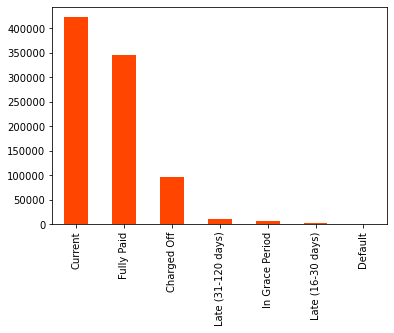

In [40]:
data['loan_status'].value_counts().plot(kind='bar',color = 'orangered',linewidth = 3)

Añadimos los valores de 'Default' a 'Charge Off' y los valores de 'Late (31-120 days)','Late (16-30 days)','In Grace Period' en una nueva llamada 'Delays' 

In [41]:
data['loan_status'] = data['loan_status'].replace('Default','Charged Off') 
data['loan_status'] = data['loan_status'].replace(['Late (31-120 days)','Late (16-30 days)','In Grace Period'],'Delays') 

Vemos que efectivamente, ahora en vez de poder tomar 7 valores, la variable objetivo 'loan_status' pasa a poder tomar 4. 

In [42]:
data['loan_status'].value_counts()

Current        422684
Fully Paid     345520
Charged Off     97081
Delays          19590
Name: loan_status, dtype: int64

<AxesSubplot:>

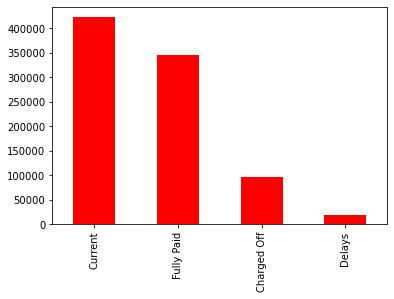

In [43]:
data['loan_status'].value_counts().plot(kind='bar',color = 'red',linewidth = 3)

Ahora transformamos la variable categórica home_ownership, que nos dice cuál es el estado de propiedad de la vivienda proporcionado por el prestatario durante el registro.

Los valores que de primeras puede tomar esta variable son: Mortage(hipoteca), rent(alquiler), own(propio), any y none. Vamos a representarla primero para ver cómo se distribuian los datos

<AxesSubplot:>

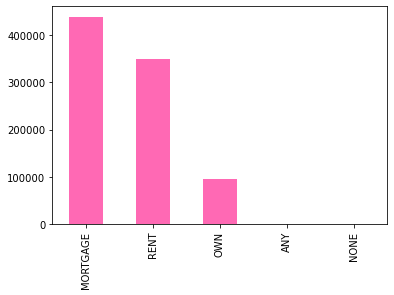

In [44]:
data['home_ownership'].value_counts().plot(kind='bar',color = 'hotpink',linewidth = 3)

Parece obvio que podemos agrupar las categorías 'any' y 'none' en una nueva a la que llamaremos 'other' que incluya ambas.

In [45]:
data['home_ownership'] = data['home_ownership'].replace(['ANY','NONE'],'OTHER') 

Finalmente, representamos cómo es la variable con los 4 niveles posibles en vez de 5.

<AxesSubplot:>

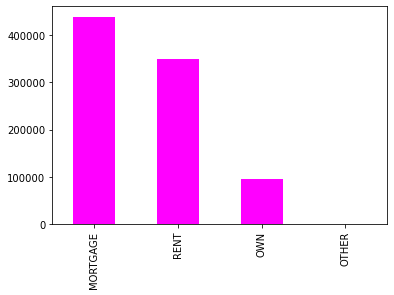

In [46]:
data['home_ownership'].value_counts().plot(kind='bar',color = 'magenta',linewidth = 3)

Vamos a continuar nuestra transformación de variables con la variable  purpose,una variable que asigna a cada cliente una categoría proporcionada por el prestatario para la solicitud de préstamo. La representamos para ver cómo se distribuían los datos:

<AxesSubplot:>

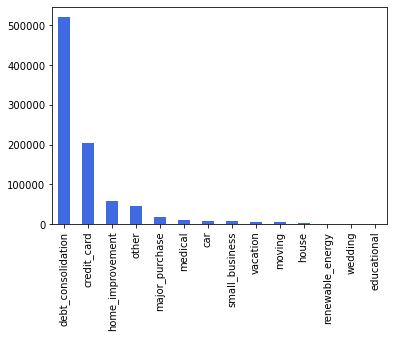

In [47]:
data['purpose'].value_counts().plot(kind='bar',color = 'royalblue',linewidth = 3)

In [48]:
data['purpose'].value_counts()

debt_consolidation    520846
credit_card           202696
home_improvement       57294
other                  45655
major_purchase         17048
medical                 9836
car                     8144
small_business          7941
vacation                5801
moving                  5788
house                   3318
renewable_energy         494
wedding                   13
educational                1
Name: purpose, dtype: int64

En este caso, simplemente incluiremos las categorías educational, wedding y renewable_energy en other para reducir el rango de la variable

In [49]:
data['purpose'] = data['purpose'].replace(['wedding','educational','renewable_energy'],'other') 

Finalmente, veamos cómo se distribujen los datos con las nuevas categorías

<AxesSubplot:>

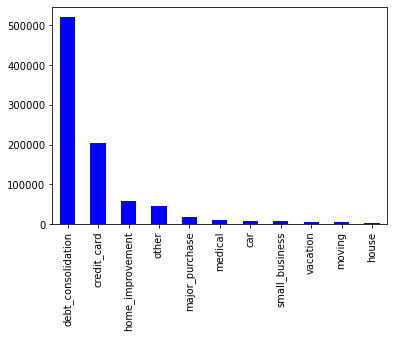

In [50]:
data['purpose'].value_counts().plot(kind='bar',color = 'blue',linewidth = 3)

En el descriptivo cuando analizabamos la distribución de los valores de la variable objetivo (Loan_status) nos quedó pendiente ver cómo se comportan algunas variables respecto a loan_status. Ahora que ya hemos tranformado las variables y hemos imputado missings nos parece adecuado verlo:

Esto es muy interesante ya que nos hacemos a la idea de cómo varía cada variable dependiendo de la categoria del loan_status

<AxesSubplot:xlabel='term', ylabel='count'>

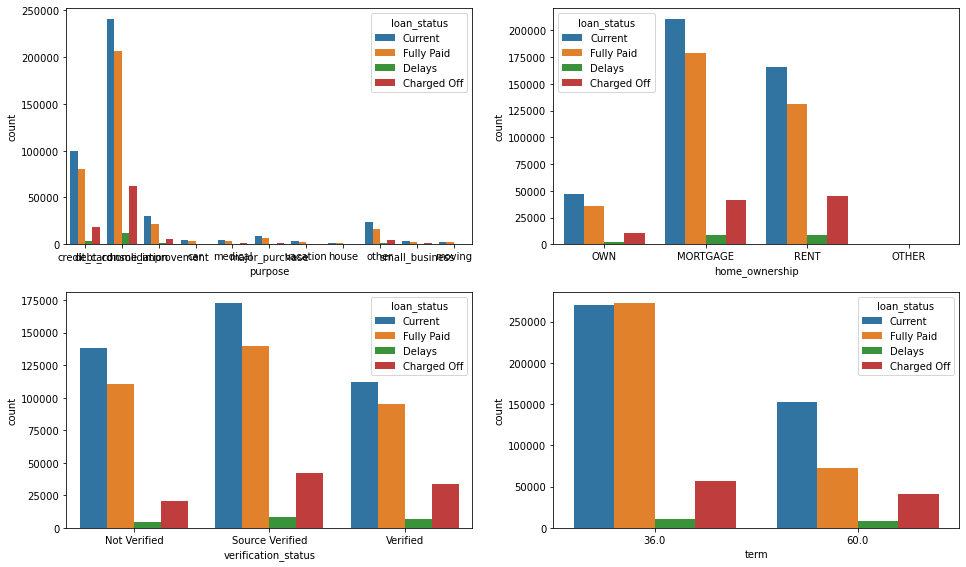

In [51]:
plt.figure(figsize=(16, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='purpose', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
sns.countplot(x='term', data=data, hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

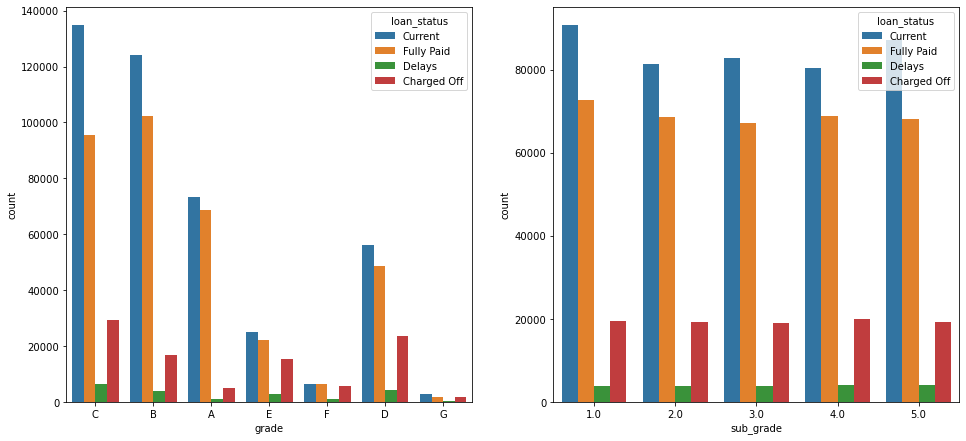

In [52]:
plt.figure(figsize=(16, 16))

plt.subplot(2, 2, 1)
sns.countplot(x='grade', data=data, hue='loan_status')

plt.subplot(2, 2, 2)
sns.countplot(x='sub_grade', data=data, hue='loan_status')

In [53]:
#HACER ALGUNA TRANSFORMACION CON ALGUNA CONTINUA!!comentar mas



### 4. Entrenamiento y test

En este apartado partiremos el conjunto de datos en un subconjunto de entrenamiento y oto de test.
Los datos de entrenamiento son los datos que usaremos para entrenar un modelo. La calidad de nuestro modelo de aprendizaje automático va a ser directamente proporcional a la calidad de los datos.
Los datos pertenecientes a test son los datos que nos “reservamos” para comprobar si el modelo que hemos generado a partir de los datos de entrenamiento “funciona”.
Para evitar errores por  un sobreajuste (o overfitting) o un subajuste (o underfitting) tenemos que conservar las proporciones originales de cada subconjunto de la variable objetivo loan_status.

In [56]:
data_loan_status = data['loan_status']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

data_loan_status_conteo =data['loan_status'].value_counts().reset_index()
data_loan_status_pc = pd.merge(data_loan_status, 
                                  data_loan_status_conteo, on=['index'], how='inner')

fig = px.histogram(data_loan_status_pc, x="index", y=['percent'])
fig.show()

In [60]:
from sklearn.model_selection import train_test_split
X_data, X_data_test, y_data, y_data_test = train_test_split(data.drop('loan_status',axis=1), 
                                                                     data['loan_status'], 
                                                                     stratify=data['loan_status'], 
                                                                     test_size=0.2)
data_train = pd.concat([X_data, y_data],axis=1)
data_test = pd.concat([X_data_test, y_data_test],axis=1)

In [61]:
print('== Train\n', data_train['loan_status'].value_counts(normalize=True))
print('== Test\n', data_test['loan_status'].value_counts(normalize=True))

== Train
 Current        0.477676
Fully Paid     0.390473
Charged Off    0.109712
Delays         0.022139
Name: loan_status, dtype: float64
== Test
 Current        0.477678
Fully Paid     0.390473
Charged Off    0.109710
Delays         0.022139
Name: loan_status, dtype: float64
